# Week 2 Part 1 - Network Analysis: Graph Theory, Definitions 
### Assignment3: Graph Visualization (DATA620)


##### Authors: John Mazon, Leticia Cancel, Bharani Nittala 


# Import Libraries

In [36]:
import networkx as nx
import numpy as np
import pylab as pl
import scipy as sp
import time
import random
import queue
import pandas as pd
from IPython.display import display
from matplotlib import pyplot as plt
%matplotlib inline

#in this section we import the needed packages, among them 
#NetworkX which is a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.
#NumPy is a Python library used for working with arrays.It also has functions for working in domain of linear algebra, fourier transform, and matrices.
#Someone had the idea of combining both the PyPlot and NumPy namespaces into a single one (to avoid having to import two namespaces), the result is PyLab.
#SciPy is a scientific computation library that uses NumPy underneath.SciPy stands for Scientific Python.It provides more utility functions for optimization, stats and signal processing.Like NumPy, SciPy is open source so we can use it freely.
#import time is a module available in Python which provides functions for working with times, and for converting between representations. The function time.
#import random imports the random module, which contains a variety of things to do with random number generation. Among these is the random() function, which generates random numbers between 0 and 1.
#The Queue module provides a FIFO implementation suitable for multi-threaded programming. It can be used to pass messages or other data between producer and consumer threads safely. Locking is handled for the caller, so it is simple to have as many threads as you want working with the same Queue instance. A Queue’s size (number of elements) may be restricted to throttle memory usage or processing.
#pandas is a popular Python-based data analysis toolkit which can be imported using import pandas as pd . It presents a diverse range of utilities, ranging from parsing multiple file formats to converting an entire data table into a NumPy matrix array.

#display import Image from IPython
#matplotlib. pyplot is a collection of functions that make matplotlib work like MATLAB. Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc.


# Read network from text file

+ Location of data for draw graph


We loaded a graph database of our choosing from source. We used a large network dataset from the web (such as from https://snap.stanford.edu/data/), 
we loaded just a small subset of the nodes and edges. 


In [24]:
#please note url used from https://snap.stanford.edu/data/com-Amazon.html
#Networks with ground-truth communities

#Name       	Type 	                    Nodes 	     Edges 	   Communities 	 Description
#com-Amazon 	Undirected, Communities 	334,863 	925,872 	75,149   	Amazon product network

    
    
#below we read in the data located on local pc to save in "data_loc"

In [25]:
data_loc=r'C:\Users\pc\Desktop\old desk\Documents\Data 620\Assignment2\\'
graph_file=data_loc+ 'com-amazon.ungraph.txt'
com_file=data_loc+'com-amazon.all.dedup.cmty.txt'
top_com_file=data_loc+'com-amazon.top5000.cmty.txt'



Dataset information

Network was collected by crawling Amazon website. It is based on Customers Who Bought This Item Also Bought feature of the Amazon website. If a product i is frequently co-purchased with product j, the graph contains an undirected edge from i to j. Each product category provided by Amazon defines each ground-truth community.

We regard each connected component in a product category as a separate ground-truth community. We remove the ground-truth communities which have less than 3 nodes. We also provide the top 5,000 communities with highest quality which are described in our paper. As for the network, we provide the largest connected component. 

+ Load graph from text files

In [26]:
g = nx.read_edgelist(graph_file)

The multi-line adjacency list format is useful for graphs with nodes
that can be meaningfully represented as strings.  With the edgelist
format simple edge data can be stored but node or graph data is not.
There is no way of representing isolated nodes unless the node has a
self-loop edge.

# Analysis graph
A network refers to a structure representing a group of objects/people and relationships between them. It is also known as a graph in mathematics. A network structure consists of nodes and edges. Here, nodes represent objects we are going to analyze while edges represent the relationships between those objects.


In [27]:
# find number of nodes and edges 
N,K=g.order(),g.size()
avg_deg=K/N
# Display number of nodes and edges
print('Number of nodes of the graph: ',N)
print('Number of edges of the graph: ',K)
print('Average degree : ',avg_deg)



Number of nodes of the graph:  334863
Number of edges of the graph:  925872
Average degree :  2.7649277465709856


In [28]:
# Density of graph
#The density of a graph is a measure of how many ties between actors exist compared to how many ties between actors are possible.

density=nx.density(g)
print('Network density: ',density)

Network density:  1.6513834036534368e-05


In [29]:
# finding triadic closure
#triadic Closure for a Graph is the tendency for nodes who has a common neighbour to have an edge between them. In case more edges are added in the Graph, these are the edges that tend to get formed

triadic_closure = nx.transitivity(g)
print("Triadic closure:", triadic_closure)

Triadic closure: 0.20522444916452579


Triadic Closure for a Graph is the tendency for nodes who has a common neighbour to have an edge between them. In case more edges are added in the Graph, these are the edges that tend to get formed. For example in the following Graph

In [30]:
# degree of graph

#Dictionaries are used to store data values in key:value pairs.A dictionary is a collection which is ordered*, changeable and does not allow duplicates.
#A DegreeView for the Graph as G.degree or G.degree().The node degree is the number of edges adjacent to the node. The weighted node degree is the sum of the edge weights for edges incident to that node.This object provides an iterator for (node, degree) as well as lookup for the degree for a single node.
degree_dict = dict(g.degree(g.nodes()))
nx.set_node_attributes(g, degree_dict, 'degree')
degrees_vals = sorted(degree_dict.items(),reverse=True)
print("Top 20 nodes by degree:")
for d in degrees_vals[:20]:
    print(d)
# plot histogram

Top 20 nodes by degree:
('99999', 4)
('99998', 4)
('99996', 2)
('99995', 6)
('99992', 3)
('99991', 17)
('99990', 2)
('9999', 3)
('99989', 4)
('99988', 2)
('99987', 7)
('99985', 3)
('99983', 7)
('99982', 4)
('99981', 5)
('99980', 7)
('99979', 25)
('99976', 4)
('99974', 1)
('99973', 4)


In [31]:
# Clustering coefficient
clust_coefficients = nx.clustering(g)
print(type(clust_coefficients))
avg_clust = sum(clust_coefficients.values()) / len(clust_coefficients)
print(avg_clust)

<class 'dict'>
0.3967463932787655


Local Clustering Coefficient of a node in a Graph is the fraction of pairs of the node’s neighbours that are adjacent to each other.

In [32]:
# function for get subgraph
def get_subgraph_bfs(graph, start_node, num_node):
    node_set = set()
    probbed = {start_node}
    bfs_queue = queue.deque()
    bfs_queue.append(start_node)
    while len(bfs_queue) > 0:
        i = bfs_queue.popleft()
        node_set.add(i)
        for j in g[i]:
            if j not in probbed:
                probbed.add(j)
                bfs_queue.append(j)
        if len(node_set) >= num_node:
            return nx.subgraph(graph, node_set)

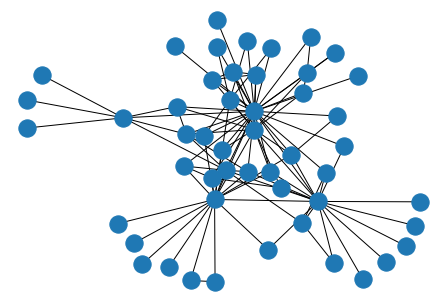

In [33]:
# get subgraph with 50 nodes
subgraph = get_subgraph_bfs(g, '1', 50)
# draw subgraph

nx.draw(subgraph)
plt.savefig("subgraph.png")

In [34]:
# get diameter of subpgrah
d=nx.diameter(subgraph)
print('Diameter of the subgraph: ',d)

Diameter of the subgraph:  4


Source (citation)

    J. Yang and J. Leskovec. Defining and Evaluating Network Communities based on Ground-truth. ICDM, 2012.